In [1]:
import sys
sys.path.append('../..')
from torchuq.metric.distribution import *
import numpy as np
import torch
from matplotlib import pyplot as plt

In [2]:
n_sample = 100
predictions = torch.distributions.normal.Normal(loc=torch.linspace(0, 4, n_sample), scale=torch.linspace(1, 4, n_sample))
samples = predictions.sample()
bad_predictions = torch.distributions.normal.Normal(loc=torch.linspace(1, 4, n_sample), scale=torch.linspace(1, 3, n_sample))

<AxesSubplot:xlabel='quantiles', ylabel='proportion samples below quantile'>

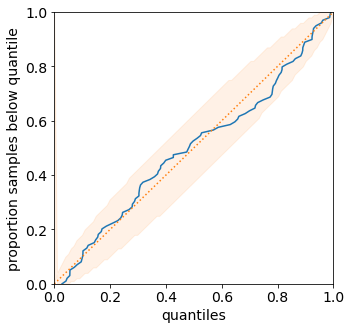

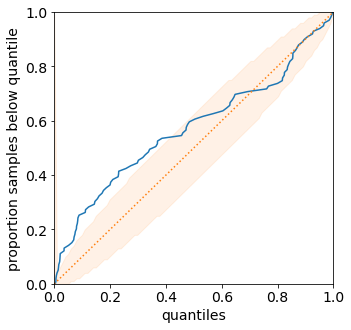

In [3]:
plot_reliability_diagram(predictions, samples)
plot_reliability_diagram(bad_predictions, samples)

In [4]:
from torchuq.transform.distribution import MonotonicRegressionCalibrator

In [5]:
calibrator = MonotonicRegressionCalibrator(verbose=True)
calibrator.train(bad_predictions, samples)

tensor(0.) tensor(1.) tensor(0.) tensor(1.)
Iteration 0, loss=0.40668, lr=0.00100


/sailhome/zhaosj12/.pyenv/versions/3.8.3/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration 1000, loss=0.01085, lr=0.00100
Iteration 2000, loss=0.00533, lr=0.00100
Iteration 3000, loss=0.00392, lr=0.00100
Iteration 4000, loss=0.00292, lr=0.00100
Iteration 5000, loss=0.00208, lr=0.00100
Iteration 6000, loss=0.00145, lr=0.00100
Iteration 7000, loss=0.00097, lr=0.00100
Iteration 8000, loss=0.00069, lr=0.00100
Iteration 9000, loss=0.00059, lr=0.00100
Iteration 10000, loss=0.00056, lr=0.00100
Iteration 11000, loss=0.00054, lr=0.00100
Iteration 12000, loss=0.00053, lr=0.00100
Iteration 13000, loss=0.00052, lr=0.00100
Iteration 14000, loss=0.00051, lr=0.00100
Iteration 15000, loss=0.00050, lr=0.00100
Iteration 16000, loss=0.00049, lr=0.00050
Iteration 17000, loss=0.00048, lr=0.00050
Iteration 18000, loss=0.00048, lr=0.00050
Iteration 19000, loss=0.00047, lr=0.00050
Iteration 20000, loss=0.00046, lr=0.00050
Iteration 21000, loss=0.00044, lr=0.00050
Iteration 22000, loss=0.00043, lr=0.00050
Iteration 23000, loss=0.00042, lr=0.00050
Iteration 24000, loss=0.00041, lr=0.00050
I

<AxesSubplot:xlabel='quantiles', ylabel='proportion samples below quantile'>

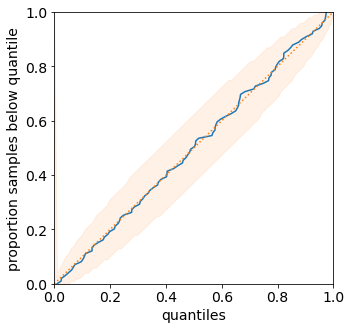

In [6]:
pred_calibrated = calibrator(bad_predictions)
plot_reliability_diagram(pred_calibrated, samples)

In [7]:
# Test the log prob, sample and rsample
shape_list = [[5, 4], [5, 4, 1], [], [1]]
pred_distribution = predictions
assert pred_calibrated.sample_n(10).shape == pred_distribution.sample_n(10).shape
assert pred_calibrated.sample().shape == pred_distribution.sample().shape
assert pred_calibrated.rsample().shape == pred_distribution.rsample().shape
for shape in shape_list:
    assert pred_calibrated.sample(shape).shape == pred_distribution.sample(shape).shape
    assert pred_calibrated.rsample(shape).shape == pred_distribution.rsample(shape).shape

/sailhome/zhaosj12/.pyenv/versions/3.8.3/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/sailhome/zhaosj12/.pyenv/versions/3.8.3/lib/python3.8/site-packages/torch/distributions/distribution.py:151: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


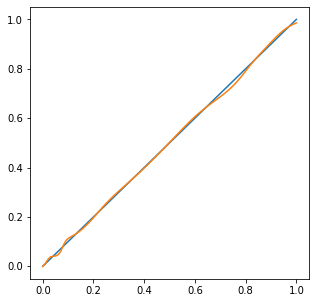

In [8]:
# Test that flow and iflow are inverse of each other
with torch.no_grad():
    original = torch.linspace(0, 1, 100)
    reconstruction = calibrator.iflow(calibrator.flow(original.view(-1, 1))[0])[0].flatten()
    residue = reconstruction - original
    plt.figure(figsize=(5, 5))
    plt.plot([0, 1], [0, 1])
    plt.plot(original, reconstruction)
    plt.show()

/sailhome/zhaosj12/.pyenv/versions/3.8.3/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


<AxesSubplot:xlabel='sample index', ylabel='label value'>

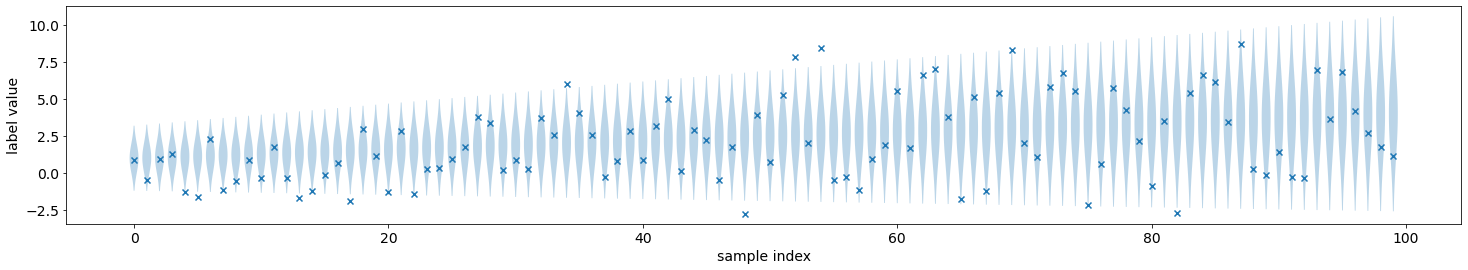

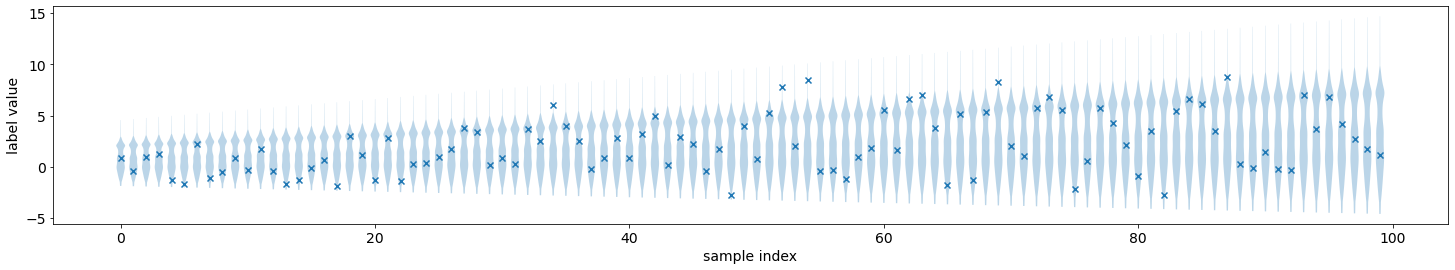

In [9]:
plot_density(bad_predictions, samples)

plot_density(pred_calibrated, samples, smooth_bw=2)

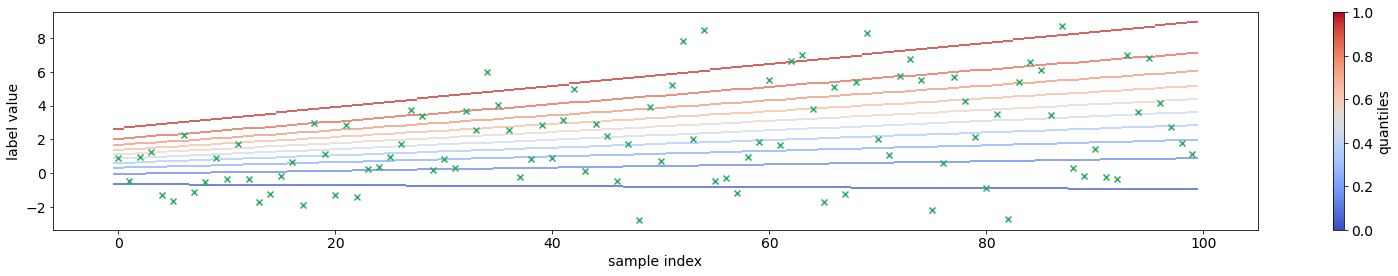

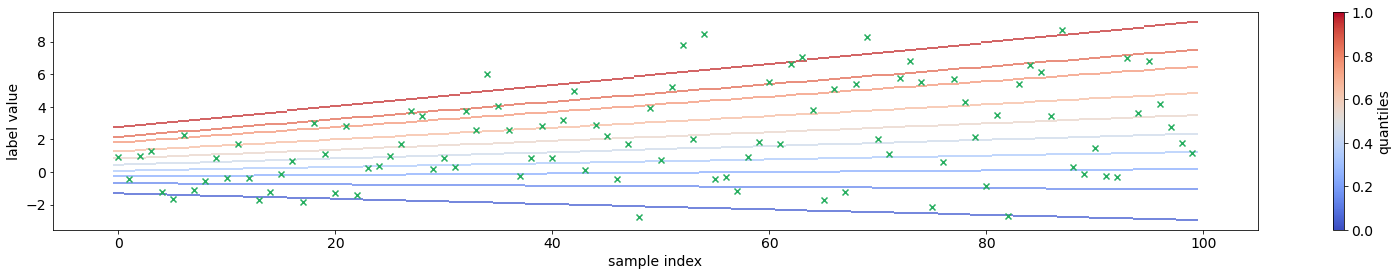

In [10]:
from torchuq.metric.quantile import *
from torchuq.transform.naive import *
plot_quantiles(distribution_to_quantile(bad_predictions, n_quantiles=10), samples)
plot_quantiles(distribution_to_quantile(pred_calibrated, n_quantiles=10), samples)